In [1]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("tranthaihoa/vifactcheck")

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence'],
        num_rows: 5062
    })
    dev: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence'],
        num_rows: 723
    })
    test: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence'],
        num_rows: 1447
    })
})

In [3]:
print("Number of unique topics:", len(set(ds['train']['Topic'])))

Number of unique topics: 52


In [4]:
set(ds['train']['Topic'])

{'AN NINH TRẬT TỰ',
 'Bạn đọc làm báo',
 'Bất động sản',
 'Chính trị',
 'Công nghệ',
 'Du lịch',
 'GIÁO DỤC',
 'GIẢI TRÍ',
 'GIỚI TRẺ',
 'Giáo dục',
 'Giáo dục - Hướng nghiệp',
 'Giải Trí',
 'Giải trí',
 'Giới trẻ',
 'HOA HẬU',
 'KHOA HỌC CÔNG NGHỆ',
 'KHOA HỌC',
 'KINH TẾ',
 'Khoa giáo',
 'Khoa học',
 'Kinh doanh',
 'Kinh tế',
 'NGƯỜI LÍNH',
 'NHỊP SỐNG PHƯƠNG NAM',
 'Nhà đất',
 'PHÁP LUẬT',
 'Pháp luật',
 'QUÂN SỰ',
 'QUỐC TẾ',
 'Quốc tế',
 'Số hóa',
 'SỨC KHỎE',
 'Sức khoẻ',
 'Sức khỏe',
 'THẾ GIỚI',
 'THỂ THAO',
 'THỜI SỰ',
 'Thế giới',
 'Thể thao',
 'Thời Sự',
 'Thời sự',
 'VĂN HOÁ',
 'VĂN HÓA',
 'Văn hoá',
 'Văn hóa',
 'XÃ HỘI',
 'Xã hội',
 'Y TẾ',
 'ĐÔ THỊ',
 'ĐỊA PHƯƠNG',
 'ĐỊA ỐC',
 'Đời sống'}

- The topics has many duplicates, so we group them into one topic.

In [5]:
new_topics_1 = {
    "THỜI SỰ": [
      "THỜI SỰ",
      "Thời Sự",
      "Thời sự"
    ],
    "THẾ GIỚI": [
      "THẾ GIỚI",
      "Thế giới",
      "QUỐC TẾ",
      "Quốc tế"
    ],
    "KINH TẾ": [
      "KINH TẾ",
      "Kinh tế",
      "Kinh doanh"
    ],
    "BẤT ĐỘNG SẢN": [
      "Bất động sản",
      "Nhà đất",
      "ĐỊA ỐC"
    ],
    "PHÁP LUẬT": [
      "PHÁP LUẬT",
      "Pháp luật",
      "AN NINH TRẬT TỰ"
    ],
    "GIÁO DỤC": [
      "GIÁO DỤC",
      "Giáo dục",
      "Giáo dục - Hướng nghiệp",
      "Khoa giáo"
    ],
    "KHOA HỌC CÔNG NGHỆ": [
      "KHOA HỌC",
      "Khoa học",
      "KHOA HỌC CÔNG NGHỆ", 
      "Công nghệ",
      "Số hóa"
    ],
    "SỨC KHỎE": [
      "SỨC KHỎE",
      "Sức khoẻ",
      "Sức khỏe",
      "Y TẾ"
    ],
    "VĂN HÓA": [
      "VĂN HOÁ",
      "VĂN HÓA",
      "Văn hoá",
      "Văn hóa"
    ],
    "GIẢI TRÍ": [
      "GIẢI TRÍ",
      "Giải Trí",
      "Giải trí",
      "HOA HẬU"
    ],
    "THỂ THAO": [
      "THỂ THAO",
      "Thể thao"
    ],
    "XÃ HỘI ĐỜI SỐNG": [
      "XÃ HỘI",
      "Xã hội",
      "Đời sống",
      "Bạn đọc làm báo",
      "NHỊP SỐNG PHƯƠNG NAM",
      "ĐỊA PHƯƠNG",
      "ĐÔ THỊ",
      "Nhịp sống trẻ"
    ],
    "QUÂN SỰ": [
      "QUÂN SỰ",
      "NGƯỜI LÍNH"
    ],
    "CHÍNH TRỊ": [
      "Chính trị"
    ],
    "GIỚI TRẺ": [
      "GIỚI TRẺ",
      "Giới trẻ"
    ],
    "DU LỊCH": [
      "Du lịch"
    ]
}

In [6]:
def map_topic_1(old_topic, new_topics):
    for new_topic, old_topics in new_topics.items():
        if old_topic in old_topics:
            return new_topic
    print("Cannot find proper topic mapping for ", old_topic)
    return old_topic

In [7]:
def generate_topics_1(row):
    row["New Topic 1"] = map_topic_1(row["Topic"], new_topics_1)
    return row

In [8]:
ds = ds.map(generate_topics_1)

Map:   0%|          | 0/5062 [00:00<?, ? examples/s]

Map:   0%|          | 0/723 [00:00<?, ? examples/s]

Map:   0%|          | 0/1447 [00:00<?, ? examples/s]

In [9]:
from collections import Counter
stat_new_topics_1 = Counter(ds['train']['New Topic 1'])
stat_new_topics_1

Counter({'THẾ GIỚI': 654,
         'GIÁO DỤC': 640,
         'KINH TẾ': 474,
         'XÃ HỘI ĐỜI SỐNG': 461,
         'THỂ THAO': 401,
         'PHÁP LUẬT': 387,
         'VĂN HÓA': 384,
         'THỜI SỰ': 320,
         'SỨC KHỎE': 303,
         'KHOA HỌC CÔNG NGHỆ': 290,
         'GIẢI TRÍ': 227,
         'CHÍNH TRỊ': 198,
         'GIỚI TRẺ': 106,
         'DU LỊCH': 81,
         'BẤT ĐỘNG SẢN': 79,
         'QUÂN SỰ': 57})

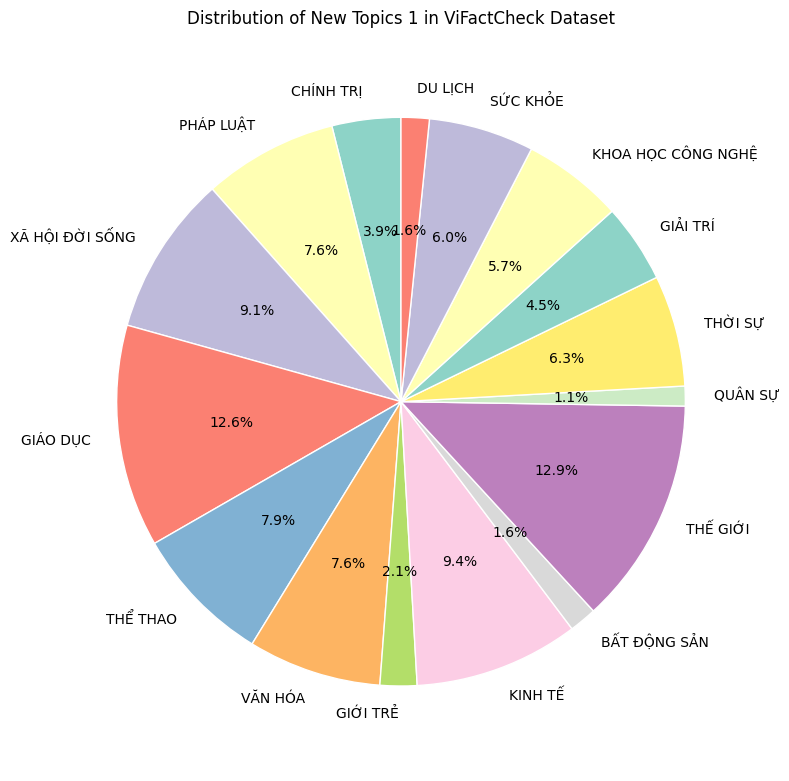

In [10]:
import matplotlib.pyplot as plt

labels = list(stat_new_topics_1.keys())
sizes = list(stat_new_topics_1.values())

fig, ax = plt.subplots(figsize=(8,8))

colors = plt.cm.Set3.colors  # colormap đẹp, dễ phân biệt

ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}  # viền trắng cho rõ
)

ax.axis('equal')
ax.set_title("Distribution of New Topics 1 in ViFactCheck Dataset", fontsize=12)

plt.tight_layout()
plt.show()


- We have 16 topics with difference percentage of questions, so we should group them into 8 topics with similar percentage of questions for better classification.

In [11]:
new_topics_2 = {
    "1": {
      "name": "CHÍNH TRỊ - PHÁP LUẬT - QUÂN SỰ",
      "labels": ["CHÍNH TRỊ", "PHÁP LUẬT", "QUÂN SỰ"]
    },
    "2": {
      "name": "KINH TẾ - BẤT ĐỘNG SẢN",
      "labels": ["KINH TẾ", "BẤT ĐỘNG SẢN"]
    },
    "3": {
      "name": "GIÁO DỤC - KHOA HỌC CÔNG NGHỆ",
      "labels": ["GIÁO DỤC", "KHOA HỌC CÔNG NGHỆ"]
    },
    "4": {
      "name": "SỨC KHỎE - XÃ HỘI ĐỜI SỐNG",
      "labels": ["SỨC KHỎE", "XÃ HỘI ĐỜI SỐNG"]
    },
    "5": {
      "name": "VĂN HÓA - GIẢI TRÍ - GIỚI TRẺ",
      "labels": ["VĂN HÓA", "GIẢI TRÍ", "GIỚI TRẺ"]
    },
    "6": {
      "name": "THỂ THAO",
      "labels": ["THỂ THAO"]
    },
    "7": {
      "name": "DU LỊCH",
      "labels": ["DU LỊCH"]
    },
    "8": {
      "name": "THẾ GIỚI - THỜI SỰ",
      "labels": ["THẾ GIỚI", "THỜI SỰ"]
    }
  }

In [12]:
new_topics_2.items()

dict_items([('1', {'name': 'CHÍNH TRỊ - PHÁP LUẬT - QUÂN SỰ', 'labels': ['CHÍNH TRỊ', 'PHÁP LUẬT', 'QUÂN SỰ']}), ('2', {'name': 'KINH TẾ - BẤT ĐỘNG SẢN', 'labels': ['KINH TẾ', 'BẤT ĐỘNG SẢN']}), ('3', {'name': 'GIÁO DỤC - KHOA HỌC CÔNG NGHỆ', 'labels': ['GIÁO DỤC', 'KHOA HỌC CÔNG NGHỆ']}), ('4', {'name': 'SỨC KHỎE - XÃ HỘI ĐỜI SỐNG', 'labels': ['SỨC KHỎE', 'XÃ HỘI ĐỜI SỐNG']}), ('5', {'name': 'VĂN HÓA - GIẢI TRÍ - GIỚI TRẺ', 'labels': ['VĂN HÓA', 'GIẢI TRÍ', 'GIỚI TRẺ']}), ('6', {'name': 'THỂ THAO', 'labels': ['THỂ THAO']}), ('7', {'name': 'DU LỊCH', 'labels': ['DU LỊCH']}), ('8', {'name': 'THẾ GIỚI - THỜI SỰ', 'labels': ['THẾ GIỚI', 'THỜI SỰ']})])

In [13]:
def map_topic_2(old_topic, new_topics):
    for _, topic_info in new_topics_2.items():
        if old_topic in topic_info['labels']:
            return topic_info['name']
    print("Cannot find proper topic mapping for ", old_topic)
    return old_topic

In [14]:
def generate_topics_2(row):
    row["New Topic 2"] = map_topic_2(row["New Topic 1"], new_topics_2)
    return row

In [15]:
ds = ds.map(generate_topics_2)

Map:   0%|          | 0/5062 [00:00<?, ? examples/s]

Map:   0%|          | 0/723 [00:00<?, ? examples/s]

Map:   0%|          | 0/1447 [00:00<?, ? examples/s]

In [16]:
stat_new_topics_2 = Counter(ds['train']['New Topic 2'])
stat_new_topics_2

Counter({'THẾ GIỚI - THỜI SỰ': 974,
         'GIÁO DỤC - KHOA HỌC CÔNG NGHỆ': 930,
         'SỨC KHỎE - XÃ HỘI ĐỜI SỐNG': 764,
         'VĂN HÓA - GIẢI TRÍ - GIỚI TRẺ': 717,
         'CHÍNH TRỊ - PHÁP LUẬT - QUÂN SỰ': 642,
         'KINH TẾ - BẤT ĐỘNG SẢN': 553,
         'THỂ THAO': 401,
         'DU LỊCH': 81})

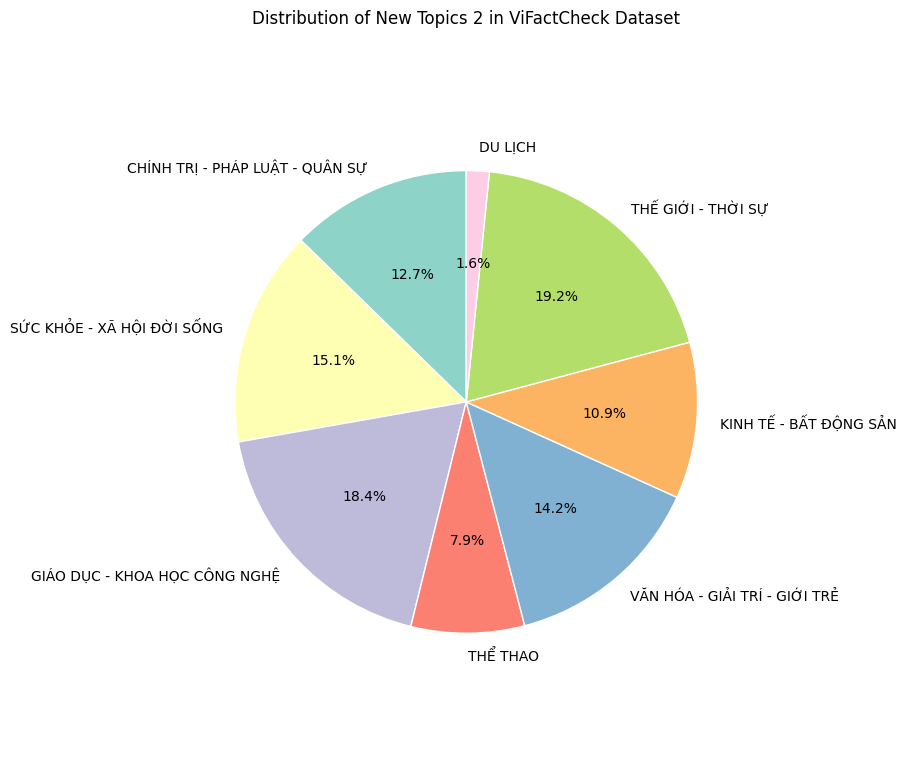

In [17]:
import matplotlib.pyplot as plt

labels = list(stat_new_topics_2.keys())
sizes = list(stat_new_topics_2.values())

fig, ax = plt.subplots(figsize=(9,8))

colors = plt.cm.Set3.colors  # colormap đẹp, dễ phân biệt

ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}  # viền trắng cho rõ
)

ax.axis('equal')
ax.set_title("Distribution of New Topics 2 in ViFactCheck Dataset", fontsize=12)

plt.tight_layout()
plt.show()


In [18]:
def map_topic_2_to_id(topic, topics_info):
    for id, topic_info in topics_info.items():
        if topic == topic_info['name']:
            return id
    print("Cannot find proper topic id mapping for ", topic)
    return topic

def generate_topics_2_to_id(row):
    row["Topic ID"] = map_topic_2_to_id(row["New Topic 2"], new_topics_2)
    return row

In [19]:
ds = ds.map(generate_topics_2_to_id)

Map:   0%|          | 0/5062 [00:00<?, ? examples/s]

Map:   0%|          | 0/723 [00:00<?, ? examples/s]

Map:   0%|          | 0/1447 [00:00<?, ? examples/s]

In [20]:
ds

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence', 'New Topic 1', 'New Topic 2', 'Topic ID'],
        num_rows: 5062
    })
    dev: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence', 'New Topic 1', 'New Topic 2', 'Topic ID'],
        num_rows: 723
    })
    test: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence', 'New Topic 1', 'New Topic 2', 'Topic ID'],
        num_rows: 1447
    })
})

In [23]:
from huggingface_hub import notebook_login

notebook_login()

In [24]:
ds.push_to_hub("hihihohohehe/vifactcheck-normalized")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/hihihohohehe/vifactcheck-normalized/commit/42489f0327afa24ed4b809c60c6a22ff1d616b89', commit_message='Upload dataset', commit_description='', oid='42489f0327afa24ed4b809c60c6a22ff1d616b89', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/hihihohohehe/vifactcheck-normalized', endpoint='https://huggingface.co', repo_type='dataset', repo_id='hihihohohehe/vifactcheck-normalized'), pr_revision=None, pr_num=None)